In [7]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from classifiers import RandomForestWithNaiveBayesLeavesClassifier, RandomForestClassifier
from datasets import *
from experiment import Experiment
import matplotlib.pyplot as plt
%matplotlib inline


opt_min_samples_leaf = 15
opt_min_samples_split = 5
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
better_rf = RandomForestWithNaiveBayesLeavesClassifier(n_estimators=10,
                                                       min_samples_leaf=opt_min_samples_leaf,
                                                       min_samples_split=opt_min_samples_split,
                                                       criterion='entropy')

### add here new datasets
datasets = [
            AdultDataset(),
           AbaloneDataset(),
           ArrhythmiaDataset(),
           BalanceScaleDataset(),
           LetterRecognitionDataset(),
           ContraceptiveMethodChoiceDataset(),
           DermatologyDataset(),
           ChessDataset(),
           CarDataset(),
           GlassDataset()]

model_scores = []
for dataset in datasets:
        exp = Experiment(rf, better_rf, dataset)
        exp.run()
        exp.print_results()
        print("\n")
        model_scores.append(exp.get_results())
        
model1_scores = [scores['model1'] for scores in model_scores]
model2_scores = [scores['model2'] for scores in model_scores]

print(model1_scores)
print(model2_scores)

run took 49.70 sec
Dataset: AdultDataset
shape: (48842, 15)
RandomForestClassifier score: 0.85
RandomForestWithNaiveBayesLeavesClassifier score: 0.71


run took 8.67 sec
Dataset: AbaloneDataset
shape: (4177, 9)
RandomForestClassifier score: 0.24
RandomForestWithNaiveBayesLeavesClassifier score: 0.23


run took 0.97 sec
Dataset: ArrhythmiaDataset
shape: (452, 280)
RandomForestClassifier score: 0.75
RandomForestWithNaiveBayesLeavesClassifier score: 0.79


run took 0.84 sec
Dataset: BalanceScaleDataset
shape: (625, 5)
RandomForestClassifier score: 0.06
RandomForestWithNaiveBayesLeavesClassifier score: 0.18


run took 26.08 sec
Dataset: LetterRecognitionDataset
shape: (20000, 17)
RandomForestClassifier score: 0.93
RandomForestWithNaiveBayesLeavesClassifier score: 0.93


run took 1.52 sec
Dataset: ContraceptiveMethodChoiceDataset
shape: (1473, 10)
RandomForestClassifier score: 0.47
RandomForestWithNaiveBayesLeavesClassifier score: 0.42


run took 0.41 sec
Dataset: DermatologyDataset
shape: 

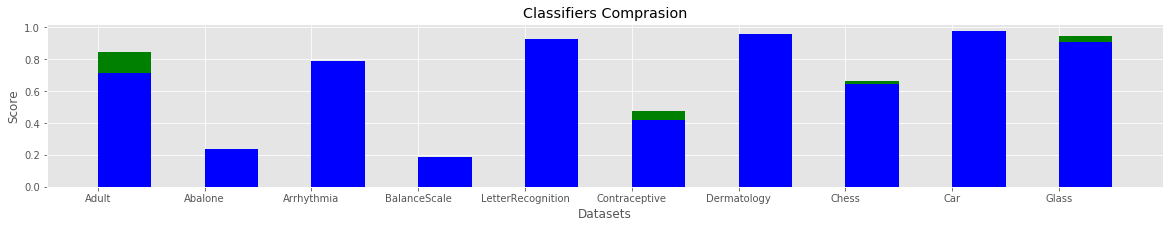

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = [         
    "Adult",
    "Abalone",
    "Arrhythmia",
    "BalanceScale",
    "LetterRecognition",
    "Contraceptive",
    "Dermatology",
    "Chess",
    "Car",
    "Glass"
]  

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(20, 3)) 
plt.bar(x_pos, model1_scores, color='green',width=0.5,align='edge')
plt.bar(x_pos, model2_scores, color='blue',width=0.5,align='edge')
plt.xlabel("Datasets")
plt.ylabel("Score")
plt.title("Classifiers Comprasion")

plt.xticks(x_pos, x)

plt.show()

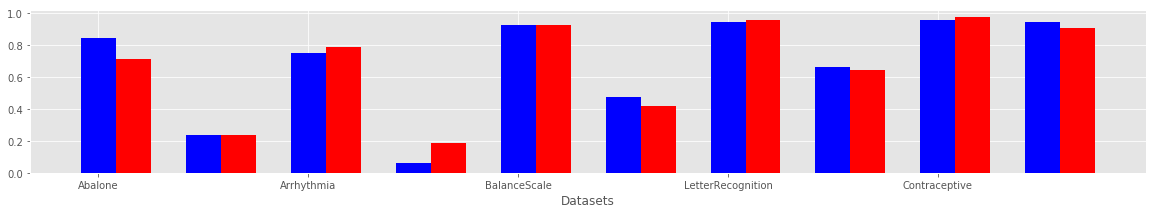

In [9]:
#
import numpy as np
import matplotlib.pyplot as plt

# The data
womenMeans = model1_scores
menMeans = model2_scores
indices = range(len(womenMeans))
names = x
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(111)
ax.bar(indices-width/2.,womenMeans,width,color='b',label='-Ymin', align='edge')
ax.bar(indices+width/2.,menMeans,width,color='r',label='Ymax', align='edge')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(names)
ax.set_xlabel('Datasets')
plt.show()